In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
245 2023-08-21  127.849998  129.259995  127.160004  128.929993  128.929993   
246 2023-08-22  129.130005  130.949997  128.925003  129.690002  129.690002   
247 2023-08-23  130.850006  134.070007  130.509995  133.210007  133.210007   
248 2023-08-24  134.727005  134.970001  130.300003  130.419998  130.419998   
249 2023-08-25  130.139999  131.399994  128.039993  130.690002  130.690002   

       Volume  
245  21851100  
246  15569400  
247  26497000  
248  18680400  
249  20671000  


In [ ]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-08-29  110.339996
1 2022-08-30  109.910004
2 2022-08-31  109.150002
3 2022-09-01  110.550003
4 2022-09-02  108.680000


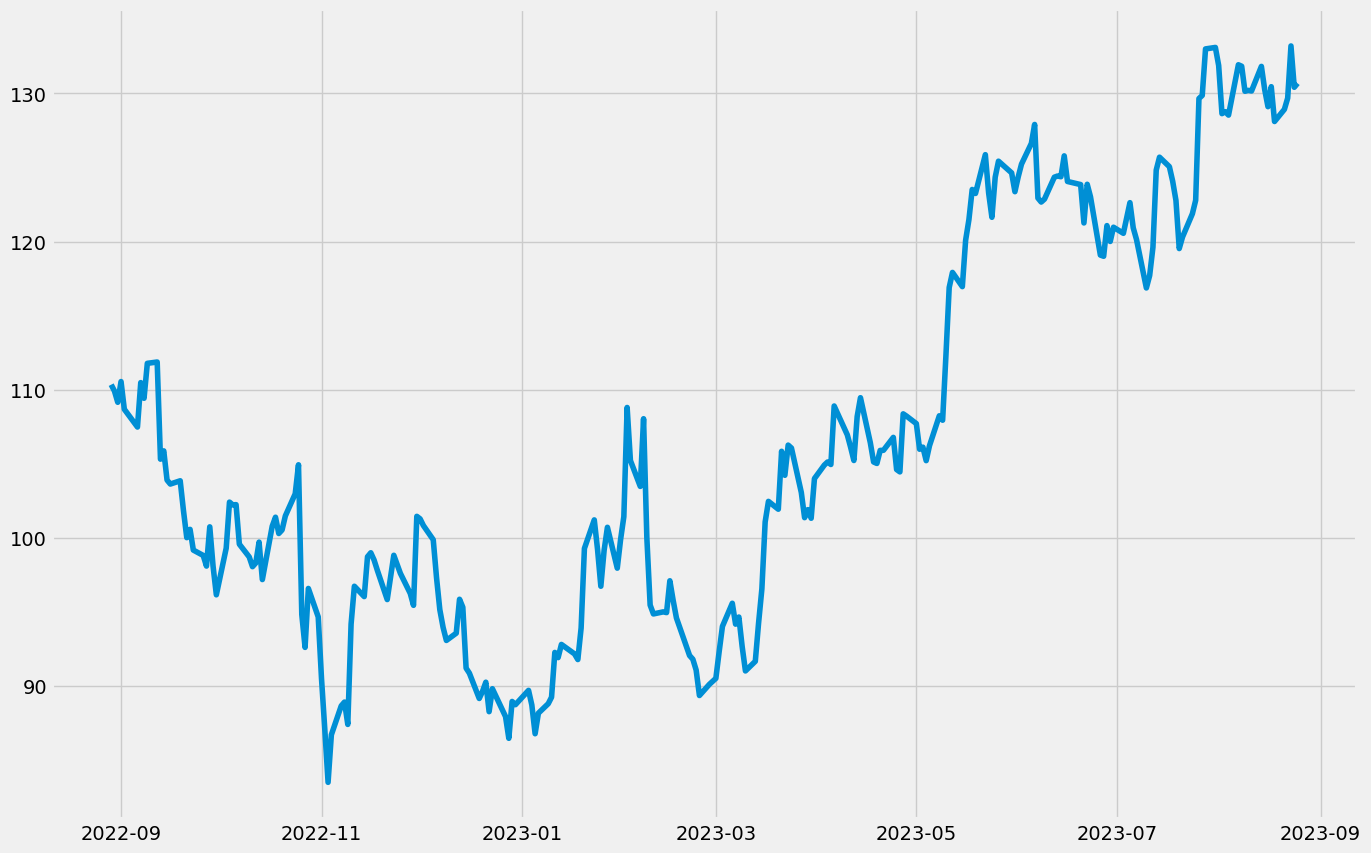

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

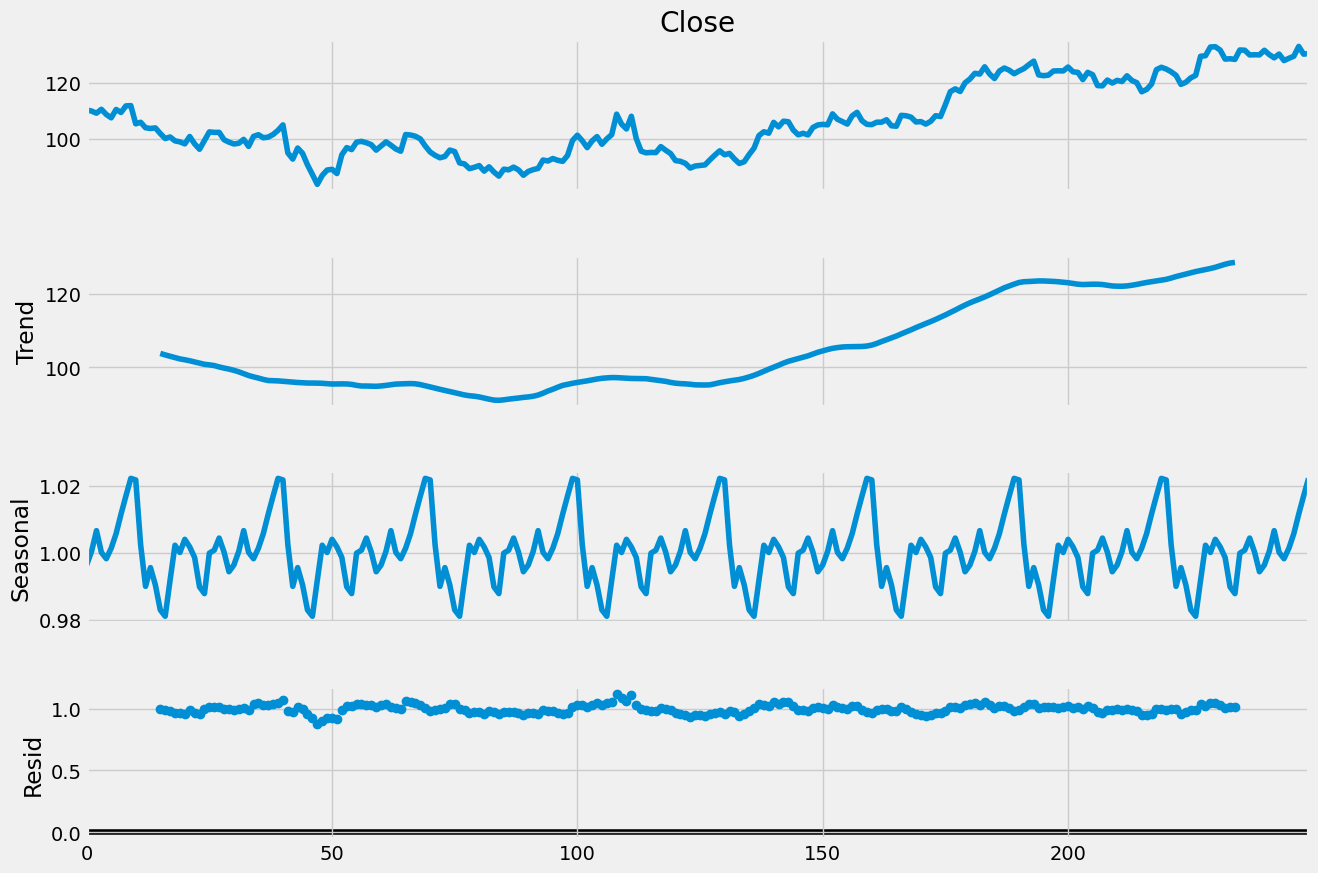

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative',period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

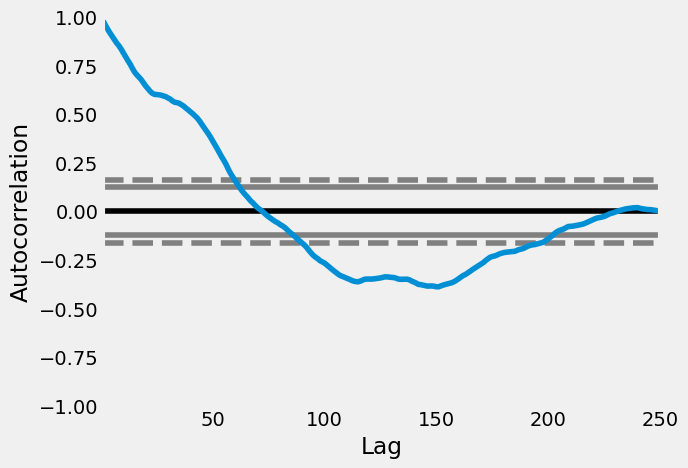

In [ ]:
pd.plotting.autocorrelation_plot(data["Close"])

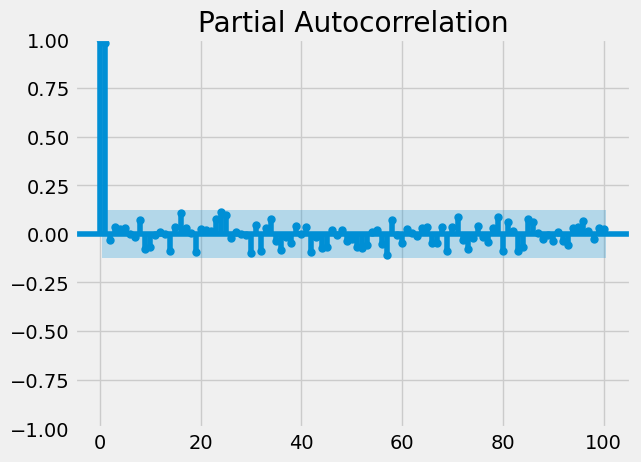

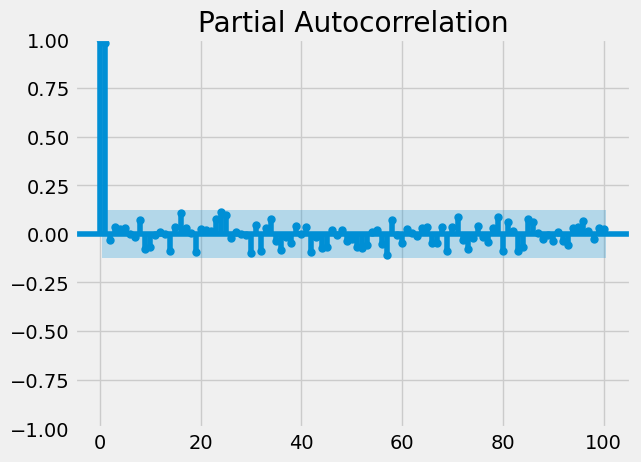

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [ ]:
 !pip install statsmodels==0.12.1

  Using cached statsmodels-0.12.1.tar.gz (17.4 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.7 MB/s eta 0:00:00


In [ ]:
import statsmodels.api as sm

In [ ]:
p, d, q = 5, 1, 2
#from statsmodels.tsa.arima.model.ARIMA import ARIMA
model = sm.tsa.arima.ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -557.644
Date:                Sun, 27 Aug 2023   AIC                           1131.287
Time:                        11:19:30   BIC                           1159.427
Sample:                             0   HQIC                          1142.614
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3095      4.628      0.067      0.947      -8.761       9.380
ar.L2          0.1131      1.154      0.098      0.922      -2.149       2.375
ar.L3          0.0452      0.575      0.079      0.9

In [ ]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      110.340016
2      109.895576
3      109.171002
4      110.684484
          ...    
245    127.920925
246    129.318273
247    129.504130
248    133.428387
249    129.824891
Name: predicted_mean, Length: 250, dtype: float64


In [ ]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -544.432
Date:                            Sun, 27 Aug 2023   AIC                           1118.865
Time:                                    11:20:59   BIC                           1170.885
Sample:                                         0   HQIC                          1139.832
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2939      3.396      0.087      0.931      -6.363       6.950
ar.L2          0.0674      0.821   

In [ ]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

250    130.694706
251    128.568249
252    129.593423
253    129.245940
254    128.858089
255    129.829555
256    130.053802
257    129.555000
258    129.655427
259    130.123732
260    131.154711
Name: predicted_mean, dtype: float64


<Axes: >

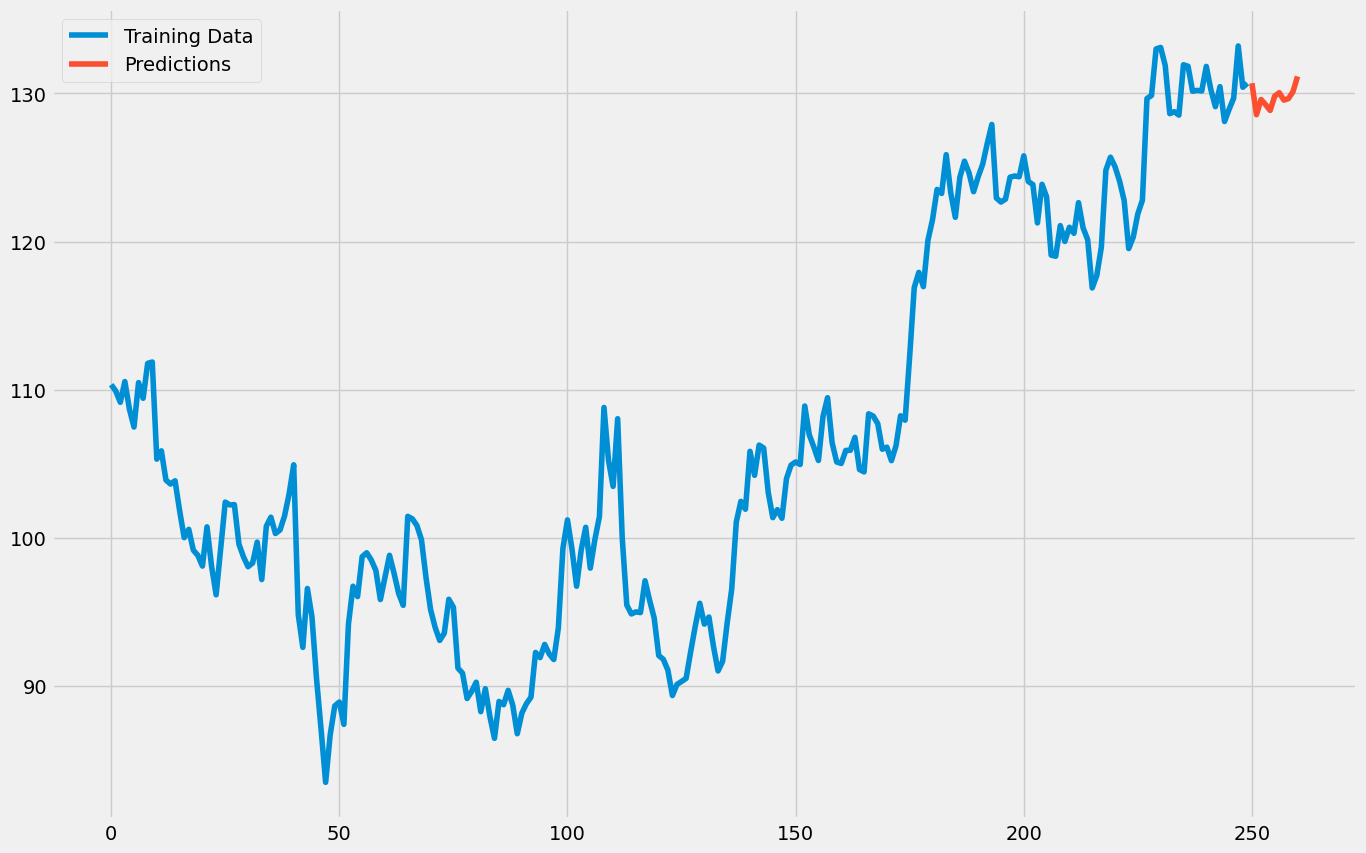

In [ ]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")